In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.transform import resize
from skimage.feature import local_binary_pattern
from skimage.io import imread, imshow

from sklearn.mixture import GaussianMixture
import os

In [2]:
metadata = pd.read_csv("./../metadata.csv")
metadata = metadata.query('day == True and snow == True ')
metadata

,path,name,snow,day,node
265,./images/all/1668258019692423953-sample.jpg,1668258019692423953-sample.jpg,True,True,W014
266,./images/all/1668261619815156204-sample.jpg,1668261619815156204-sample.jpg,True,True,W014
267,./images/all/1668265221389059798-sample.jpg,1668265221389059798-sample.jpg,True,True,W014
268,./images/all/1668268820152388507-sample.jpg,1668268820152388507-sample.jpg,True,True,W014
269,./images/all/1668272421912809968-sample.jpg,1668272421912809968-sample.jpg,True,True,W014
...,...,...,...,...,...
2502,./images/all/1682294412807087334-sample.jpg,1682294412807087334-sample.jpg,True,True,W083
2503,./images/all/1682298012298710492-sample.jpg,1682298012298710492-sample.jpg,True,True,W083
2638,./images/all/1682852412008859688-sample.jpg,1682852412008859688-sample.jpg,True,True,W083
2639,./images/all/1682856012549019018-sample.jpg,1682856012549019018-sample.jpg,True,True,W083


In [3]:
images = []
lbps = []
n = 20


for i, (index, row) in enumerate(metadata.sample(9).iterrows()):
        
        path = os.path.join("./../" + row['path'])
        image = imread(path)[200:,:,:]
        image = resize(image, (224,224))
        shape = image.shape
        images.append(image)
        image = rgb2gray(image)
        lbp = local_binary_pattern(image,4,16)
        
        lbps.append(lbp)
lbps = np.array(lbps)        
images = np.array(images)

        
        
        


c:\Users\alxto\anaconda3\envs\sage\Lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


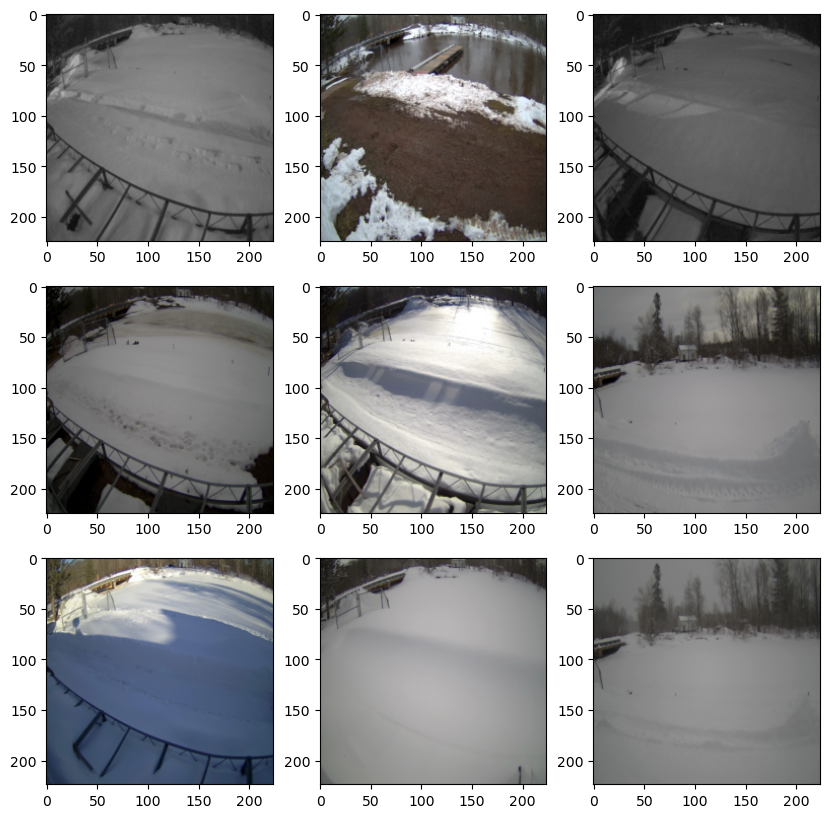

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for n, ax in enumerate(axes.flatten()):
    image = images[n].reshape(shape)
    print(image.shape)  
    ax.imshow(image)
plt.show()

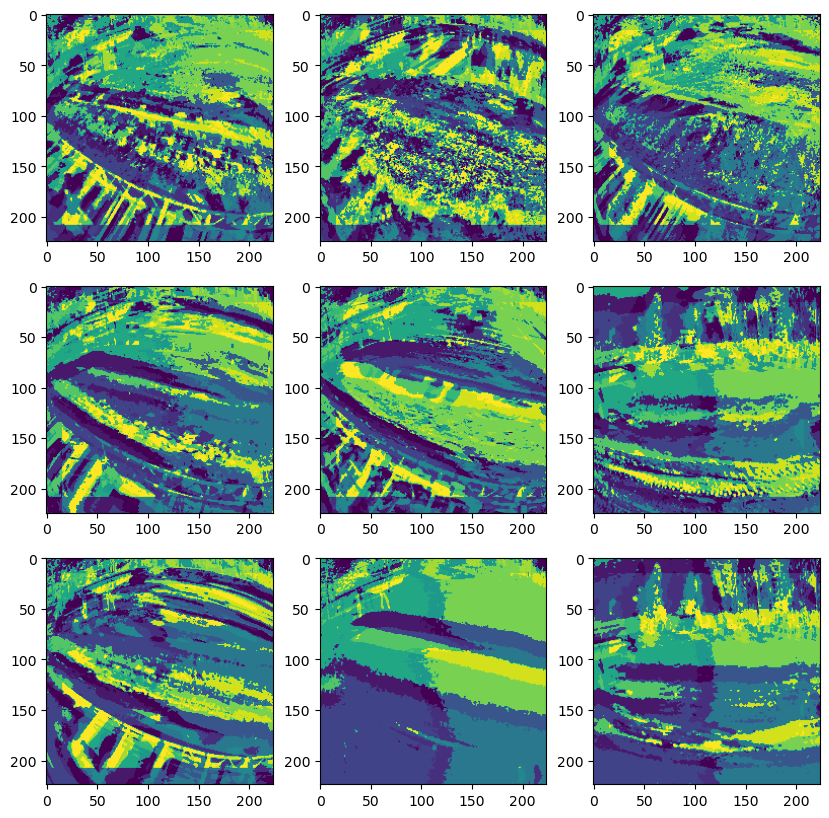

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for n, ax in enumerate(axes.flatten()):
    lbp = lbps[n]   
    
    ax.imshow(lbp)
plt.show()

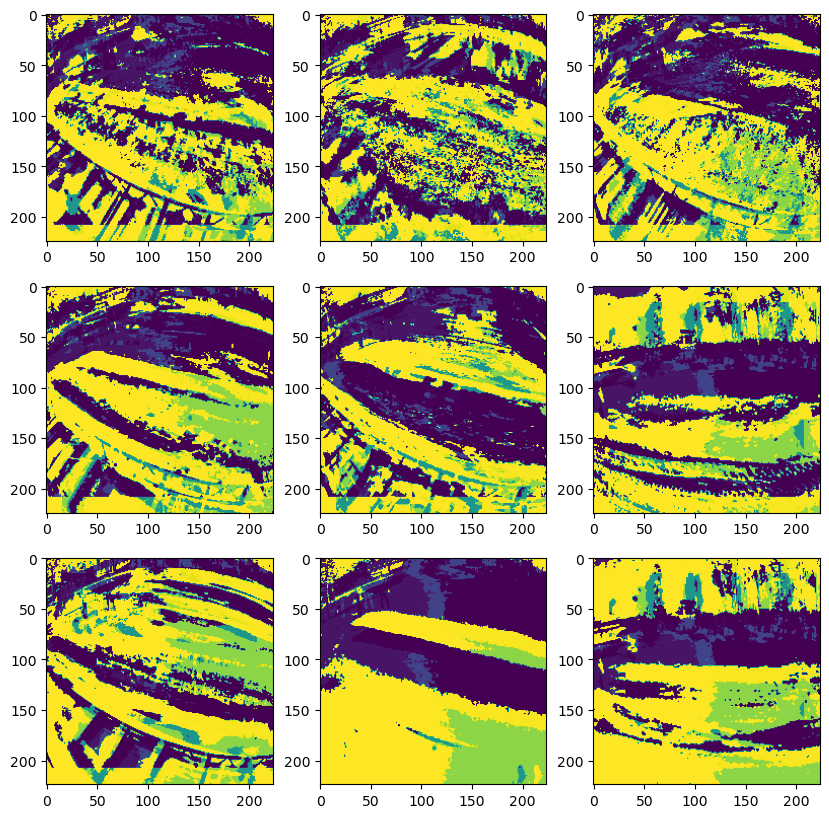

In [6]:

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

gmm = GaussianMixture(n_components=  2)
fit_lbp = lbps[0]
   
gmm.fit(fit_lbp.reshape(-1,1))
for n, ax in enumerate(axes.flatten()):
    pred_lbp = lbps[n]
    pred = gmm.predict_proba(pred_lbp.reshape(-1,1))[:,0].reshape(shape[:2])
    ax.imshow(pred)
plt.show()
  

NameError: name 'image_to_RGB' is not defined

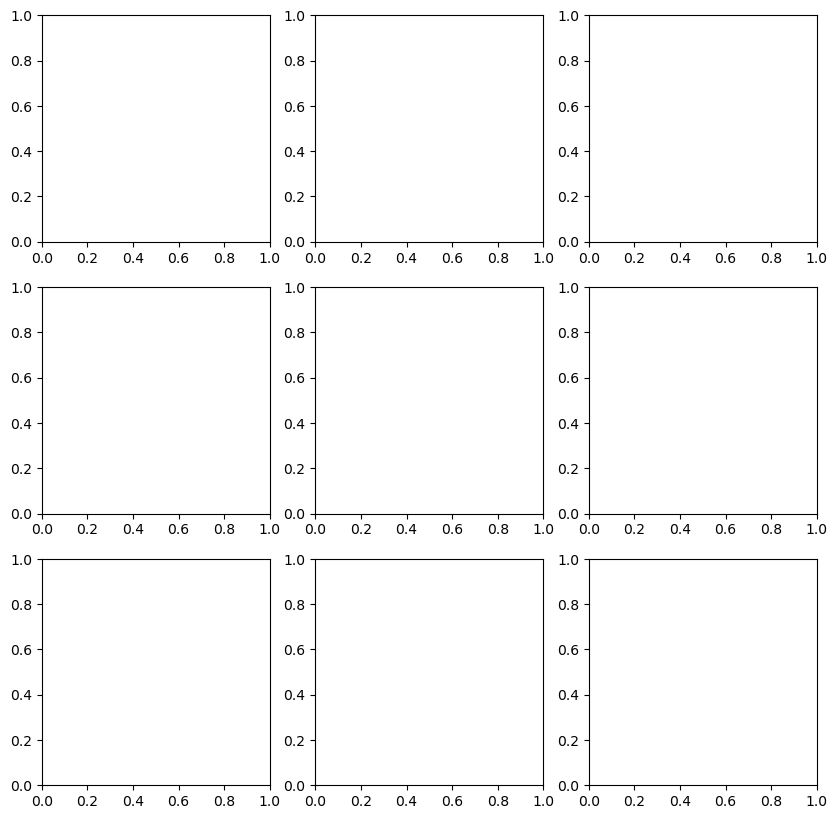

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
rows = metadata.sample(9).reset_index()

for n, ax in enumerate(axes.flatten()):
    path = os.path.join("./../" + rows.loc[n,'path'])
    image = imread(path)
    shape = image.shape
    image = image_to_RGB(image)
    pred = gmm.predict(image).reshape(shape[:2])
    ax.imshow(pred)
plt.show()


In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for n, ax in enumerate(axes.flatten()):
    path = os.path.join("./../" + rows.loc[n,'path'])
    image = imread(path)
    ax.imshow(image)
plt.show()